### 프로젝트 개요  

이 프로젝트에서 여러분은 주식에 돈을 투자하는 고객을 돕는 새로운 스타트업 투자 회사의 **데이터 과학자(Data Scientist) 또는 데이터 분석가(Data Analyst)** 역할을 맡게 됩니다.  
여러분의 임무는 Python 라이브러리와 웹 스크래핑을 사용하여 Tesla, Amazon, AMD, 그리고 GameStop과 같은 인기 있는 주식의 과거 주가 및 분기별 수익 보고서 등의 **재무 데이터를 추출**하는 것입니다.  
데이터를 수집한 후 이를 **대시보드에 시각화하여 패턴이나 트렌드를 식별**할 것입니다.

---

### 대시보드 분석 항목 표시  

대시보드는 종종 주요 성과 지표(Key Performance Indicators, KPIs)를 명확하게 보여주는 역할을 합니다.  
이 프로젝트에서는 데이터 세트를 분석하고 주요 성과 지표를 추출하는 연습을 하게 됩니다.  
데이터에 접근하고 대시보드에 데이터를 표시하는 방법에 대한 학습을 지원하기 위해 다양한 프롬프트가 제공됩니다.  
대시보드에 주요 성과 지표를 표시하는 방법을 배우는 과정도 과제에 포함됩니다.  
이 과정에서는 데이터 시각화를 위해 **Plotly**를 사용하며, 이 과정을 수강하기 위해 Plotly의 사전 지식은 필수가 아닙니다.

---

### 환경 설명  

**Python for Data Science, AI and Development** 과정에서는 **Skills Network Labs**를 활용하여 실습을 진행했습니다.  
이번 프로젝트에서도 Skills Network Labs와 **Watson Studio**를 활용하게 됩니다.  

- **Skills Network Labs**: 학습 및 실습을 위한 샌드박스 환경입니다.  
- **Watson Studio**: IBM Cloud Pak for Data의 구성 요소로, 데이터 과학자, 데이터 분석가, AI 및 머신러닝 엔지니어, 그리고 도메인 전문가들이 프로젝트를 개발 및 배포하기 위한 협업 환경입니다.

---

### 평가 기준  

- **두 가지 실습 과제**: 주식 데이터를 추출하는 두 가지 실습을 완료해야 합니다.  
- **과제 제출**: 실습을 기반으로 한 한 가지 과제를 완료해야 합니다.  

**평가 항목**:  
1. 두 개의 퀴즈  
   - 실습 과제의 결과를 기반으로 평가합니다.  
2. **Peer Review Assignment**:  
   - 과제 결과물을 공유하고 스크린샷을 제출하며, 동료의 평가를 통해 점수를 받습니다.



<h1>Extracting Stock Data Using a Python Library</h1>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


---

`Ticker` 모듈을 사용하면 데이터를 추출하는 함수에 접근할 수 있는 객체를 생성할 수 있습니다.  
이를 위해 주식의 **티커 심볼**을 제공해야 하며, 여기서 회사는 Apple이고 티커 심볼은 `AAPL`입니다.

---


In [3]:
apple = yf.Ticker("AAPL")

---

이제 필요한 데이터 유형을 추출하기 위해 함수와 변수를 사용할 수 있습니다.  
이 함수와 변수들이 무엇을 나타내는지 확인하려면 [여기](https://aroussi.com/post/python-yahoo-finance)를 참조하세요.

---

과정 제공 자료 다운로드

In [5]:
import urllib.request

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json'
urllib.request.urlretrieve(url,'apple.json')

('apple.json', <http.client.HTTPMessage at 0x1abe1af41f0>)

### Stock Info


<code>info</code> 속성을 사용하여 주식에 대한 정보를 Python 사전(dictionary) 형식으로 추출할 수 있습니다.



In [6]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

---

키 `country`를 사용하여 <code>'country'</code> 정보를 얻을 수 있습니다.

---

In [7]:
apple_info['country']

'United States'

### Extracting Share Price

---

주식 한 주(Share)는 회사 주식의 가장 작은 단위로, 이를 구매할 수 있습니다. 이러한 주식의 가격은 시간에 따라 변동합니다.  
<code>history()</code> 메서드를 사용하면 특정 기간 동안의 주식 가격을 얻을 수 있습니다.  
`period` 매개변수를 사용하여 현재로부터 얼마나 과거까지 데이터를 가져올지 설정할 수 있습니다.  
`period`에 사용할 수 있는 옵션은 다음과 같습니다:  
1일(1d), 5일(5d), 1개월(1mo), 3개월(3mo), 6개월(6mo), 1년(1y), 2년(2y), 5년(5y), 10년(10y), 연초부터 지금까지(ytd), 그리고 최대(max).

---

In [9]:
apple_share_price_data = apple.history(period='max')

데이터는 Pandas DataFrame 형식으로 반환됩니다.  
`Date`가 인덱스로 설정되며, 각 날짜에 대해 주식의 `Open`(시가), `High`(고가), `Low`(저가), `Close`(종가), `Volume`(거래량), 그리고 `Stock Splits`(주식 분할) 정보가 제공됩니다.


In [10]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0



---

`reset_index` 함수를 사용하여 DataFrame의 인덱스를 재설정할 수 있습니다.  
또한, `inplace` 매개변수를 `True`로 설정하면 변경 사항이 DataFrame 자체에 적용됩니다.

---

In [12]:
apple_share_price_data.reset_index(inplace=True)

`Open` 가격을 `Date`에 대해 그릴 수 있습니다.

<Axes: xlabel='Date'>

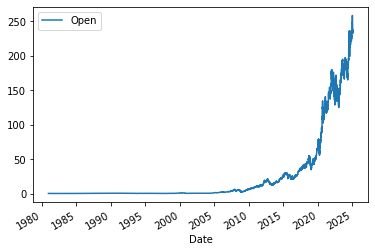

In [13]:
apple_share_price_data.plot(x='Date', y='Open')

### Extracting Dividends


---

배당금(Dividends)은 회사 이익의 일부를 주주들에게 분배하는 것입니다.  
이 경우, 투자자가 소유한 주식 한 주당 반환되는 금액으로 정의됩니다.  
`dividends` 변수를 사용하여 해당 데이터의 DataFrame을 얻을 수 있습니다.  
데이터의 기간은 `history` 함수에서 정의된 기간에 따라 결정됩니다.

---

In [15]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
Name: Dividends, Length: 85, dtype: float64

<Axes: xlabel='Date'>

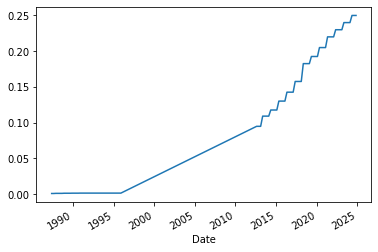

In [16]:
apple.dividends.plot()

## Exercise 

---

이제 `Ticker` 모듈을 사용하여 AMD(Advanced Micro Devices)의 티커 심볼인 `AMD`를 기반으로 객체를 생성하세요.  
객체 이름은 <code>amd</code>로 지정합니다.

---

In [18]:
amd = yf.Ticker("AMD")

In [19]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json'
urllib.request.urlretrieve(url, 'amd.json')

('amd.json', <http.client.HTTPMessage at 0x1abe67c5be0>)

In [20]:
with open("amd.json") as json_file:
    amd_info=json.load(json_file)
    
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

---

<b>질문 1</b>  
<code>'country'</code> 키를 사용하여 해당 주식이 속한 국가를 찾으세요.  
결과를 기억해 두세요. 이는 퀴즈 문제로 출제될 것입니다.

---


In [21]:
amd_info['country']

'United States'

---

<b>질문 2</b>  
<code>'sector'</code> 키를 사용하여 해당 주식이 속한 섹터를 찾으세요.  
결과를 기억해 두세요. 이는 퀴즈 문제로 출제될 것입니다.

---

In [22]:
amd_info['sector']

'Technology'



---

<b>질문 3</b>  
`history` 함수를 사용하여 AMD의 주식 데이터를 얻으세요.  
`period`를 `max`로 설정합니다.  
첫 번째 날(첫 번째 행)의 거래량(`Volume`)을 찾으세요.

---



In [23]:
amd_price = amd.history(period='max')

In [27]:
amd_price.Volume[0]

219600